In [5]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode

In [4]:
device = torch.device("cpu")

In [7]:
# Adapt to 4 channels

transforms_train = A.Compose([
        A.Flip(),
        A.Rotate(),
        ToTensorV2()
    ])

transforms_val = A.Compose([
        ToTensorV2()
    ])

In [24]:
class ImageDataset(Dataset):
    
    def __init__(self, root_dir='sprites/processed_sprites', transform = None):
        
        self.root_dir = Path(root_dir)
        self.image_list = list(self.root_dir.glob('*.png'))
        self.transform = transform
        
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        
        img_path = self.image_list[idx]
        img = read_image(str(img_path), ImageReadMode.RGB_ALPHA)
               
        if self.transform is not None:
            img = self.transform(img)
            
        img = img.to(device)

        return img

In [25]:
loader = DataLoader(ImageDataset(), batch_size=1)

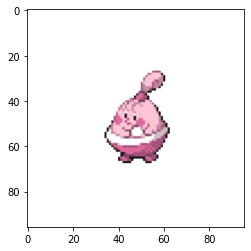

In [31]:
for im in loader:
    fig, ax = plt.subplots()
    ax.imshow(im[0].permute(1,2,0))
    fig.show()
    break